In [101]:
import keras
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [102]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [103]:
x_train.shape

(60000, 28, 28)

In [104]:
y_train.shape

(60000,)

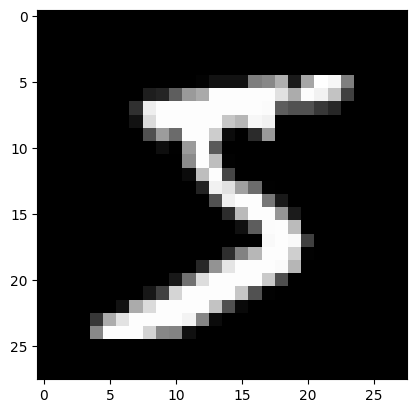

In [105]:
plt.imshow(x_train[0], cmap="gray")

In [106]:
x_flat = x_train.reshape((x_train.shape[0], -1))
df = pandas.DataFrame(x_flat)
df['label'] = y_train

display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [107]:
x_train_nn = x_train.astype('float32') / 255.0
x_test_nn = x_test.astype('float32') / 255.0
x_train_nn = x_train_nn.reshape((x_train_nn.shape[0], 28*28))
x_test_nn = x_test_nn.reshape((x_test_nn.shape[0], 28*28))
y_train_nn = to_categorical(y_train, 10)
y_test_nn = to_categorical(y_test, 10)

In [108]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/gabriel/mypy/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
history = model.fit(x_train_nn, y_train_nn, epochs=15, batch_size=64, validation_split=0.1)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9251 - loss: 0.2552 - val_accuracy: 0.9718 - val_loss: 0.0996
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9700 - loss: 0.1001 - val_accuracy: 0.9737 - val_loss: 0.0893
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9806 - loss: 0.0642 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9863 - loss: 0.0456 - val_accuracy: 0.9775 - val_loss: 0.0727
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9886 - loss: 0.0351 - val_accuracy: 0.9793 - val_loss: 0.0721
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9905 - loss: 0.0293 - val_accuracy: 0.9768 - val_loss: 0.0864
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9803 - val_loss: 0.0793
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9935 - loss: 0.0196 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0887
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


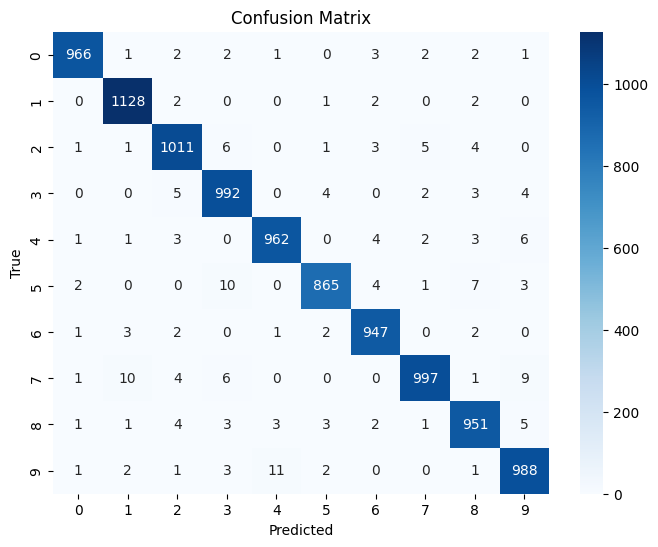

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Test accuracy: 0.9807


In [110]:
loss, accuracy = model.evaluate(x_test_nn, y_test_nn)

pred_probs = model.predict(x_test_nn)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_nn, axis=1)

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_classes, pred_classes))
print(f'Test accuracy: {accuracy:.4f}')
